1. Generar una red neuronal (sin librerias) que utilice el dataset iris con producto punto, errores y de dos capas.

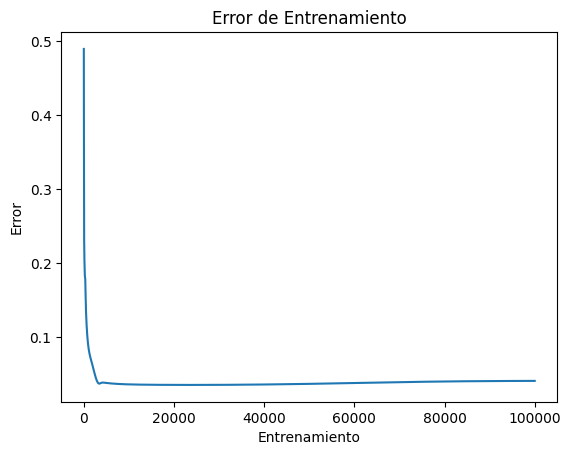

Precisión del modelo en el conjunto de prueba: 95.6 %


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Función de activación sigmoidal y su derivada
def sigmoid(x):
    clipped_x = np.clip(x, -500, 500)  # Limitar x para evitar desbordamientos
    return 1 / (1 + np.exp(-clipped_x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Normalización de los datos
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

# Carga del dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Normalización de los datos
X_normalized = normalize(X)

# Transformación de las etiquetas a one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

y_one_hot = to_one_hot(y)

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=0.33)

# -> Definición de los pesos iniciales para las capas
np.random.seed(42)  # Para reproducibilidad
w0 = 2 * np.random.random((4, 5)) - 1  # Capa de entrada - 4 entradas, 5 neuronas en la capa oculta
w1 = 2 * np.random.random((5, 3)) - 1  # Capa oculta - 5 entradas, 3 salidas

# Tasa de aprendizaje
learning_rate = 0.1

# Almacenamiento de errores para visualización posterior
errors = []

# Entrenamiento de la red neuronal
for i in range(100000):
    # Feed forward
    # -> Se realiza el producto punto entre las entradas y los pesos de las capas oculta 
    # y de salida durante el proceso de feedforward:
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # Backpropagation usando descenso de gradiente
    # -> Se calculan los errores de la red y se realiza el backpropagation para ajustar los pesos
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_derivative(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * learning_rate
    w0 += layer0.T.dot(layer1_delta) * learning_rate
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)

# Visualización del error durante el entrenamiento
plt.plot(errors)
plt.xlabel('Entrenamiento')
plt.ylabel('Error')
plt.title('Error de Entrenamiento')
plt.show()

# Evaluación de la precisión en el conjunto de prueba
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Precisión del modelo en el conjunto de prueba:", round(accuracy, 2), "%")

Esta red neuronal se entrena para aprender patrones en los datos de iris y clasificar las muestras en las clases correctas. La visualización del error durante el entrenamiento proporciona una idea de cómo la red neuronal está aprendiendo a medida que ajusta sus pesos para reducir la discrepancia entre las predicciones y los valores reales. La precisión final del modelo se evalúa en el conjunto de prueba y representa qué tan bien generaliza la red neuronal a datos nuevos no vistos.